# Climate models EURO-CORDEX 

The climate models analyzed here are the ones suggested by the German Metereological Service (DWD). The climate variables to analyze are precipitation, air temperature and relative humidity. Only the RCP8.5 is analyzed since corresponds to the most plausable scenario. These models are bias corrected and downscaled  (5x5 km²)and correspond to decadal predictions of the German climate prediction system.

In [1]:
#import libraries
%matplotlib notebook
import geopandas as gpd
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import os
from functions import loadccvar
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import linregress
import numpy as np
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.colors as colors
import contextily as cx
from mpl_toolkits.axes_grid1 import make_axes_locatable
from functions import mapplot

## Load data per well ID

In [55]:

#Define figures path
fpath="D:/Data/students/mariana/Documents/Figures/"
ppath="D:/Data/students/mariana/data/Pickle/"
#Define climate model data path 
rpath="D:/Data/students/mariana/data/Klimamodelle/"
#Load well locations
gw_sel=gpd.read_file("D:/Data/students/mariana/data/SHP/GWF2.shp")


#Climate data ID associated with the well ID
cdid=gw_sel.CD_ID_1
#cdid2=gw_sel.CD_ID_2
idcods=gw_sel.MEST_ID

#List of climate models available
lmodels=["MPI_WRF361H", "MPI_CCLM", "MIROC_CCLM", 
         "HadGEM_WRF361H", "ECE_RACMO_r12", "ECE_RACMO_r1"]
#MPI_W13 , HadGEM_W13 are with cdid2

In [ ]:
#Read data from pre-defined function and the Mann Kendall test to check if there is a significant trend 

#Select the climate model
model=lmodels[0]
scenario="RCP85"

#Precipitation
varpr, varcodfilepr, codpr = "pr", "p", "012"
datapr =loadccvar(modelname=model, var=varpr,
               varcodfile=varcodfilepr, cod=codpr,
               vcod=cdid, idcods=idcods , path=rpath, scenario=scenario)
dfcmpr=datapr.readtimeseries()


#Temperature
vartm, varcodfiletm, codtm = "tas", "t", "003"
datatm =loadccvar(modelname=model, var=vartm,
               varcodfile=varcodfiletm, cod=codtm,
               vcod=cdid, idcods=idcods , path=rpath, scenario=scenario)
dfcmtm=datatm.readtimeseries()

#Relative humidity
varrh, varcodfilerh, codrh = "hurs", "h", "003"
datarh =loadccvar(modelname=model, var=varrh,
               varcodfile=varcodfilerh, cod=codrh,
               vcod=cdid, idcods=idcods , path=rpath, scenario=scenario)
dfcmrh=datarh.readtimeseries()

In [3]:
#Read data from pre-defined function and the Mann Kendall test to check if there is a significant trend 

#Select the climate model
scenario="RCP85"
cmpr, cmtm, cmrh=[],[],[]

for model in lmodels:

        #Precipitation
        varpr, varcodfilepr, codpr = "pr", "p", "012"
        datapr =loadccvar(modelname=model, var=varpr,
                       varcodfile=varcodfilepr, cod=codpr,
                       vcod=cdid, idcods=idcods , path=rpath, scenario=scenario)
        dfcmpr=datapr.readtimeseries()
        cmpr.append(dfcmpr)


        #Temperature
        vartm, varcodfiletm, codtm = "tas", "t", "003"
        datatm =loadccvar(modelname=model, var=vartm,
                       varcodfile=varcodfiletm, cod=codtm,
                       vcod=cdid, idcods=idcods , path=rpath, scenario=scenario)
        dfcmtm=datatm.readtimeseries()
        cmtm.append(dfcmtm)

        #Relative humidity
        varrh, varcodfilerh, codrh = "hurs", "h", "003"
        datarh =loadccvar(modelname=model, var=varrh,
                       varcodfile=varcodfilerh, cod=codrh,
                       vcod=cdid, idcods=idcods , path=rpath, scenario=scenario)
        dfcmrh=datarh.readtimeseries()
        cmrh.append(dfcmrh)

    
    

In [27]:
#dfcmtm.pval.plot()
#plt.hlines(y=0.05, xmin=0, xmax=500, color="red")
dfcmrh.slope.plot()
plt.hlines(y=0, xmin=0, xmax=500, color="c")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


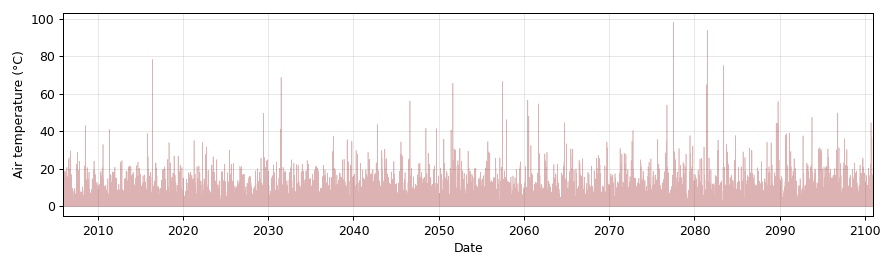

In [32]:
dfdata=dfcmpr.data[2]

plt.figure(figsize=(10,3))
plt.plot(dfdata.dates,dfdata.data.astype(float),
             markersize="2",linewidth="0.5", color="darkred", alpha=0.3)

plt.ylabel("Air temperature (°C)")
plt.xlabel("Date")
plt.ylim(min(dfdata.data)-5,max(dfdata.data)+5)
plt.xlim(min(dfdata.dates),max(dfdata.dates))
plt.grid(True, alpha=0.3)
plt.tight_layout()

In [56]:
#Save climate models data
cmprdf=pd.DataFrame({"cmodel":cmpr})
cmtmdf=pd.DataFrame({"cmodel":cmtm})
cmrhdf=pd.DataFrame({"cmodel":cmrh})

cmprdf.to_pickle(ppath+"cmprdf.pkl")
cmtmdf.to_pickle(ppath+"cmtmdf.pkl")
cmrhdf.to_pickle(ppath+"cmrhdf.pkl")

<IPython.core.display.Javascript object>


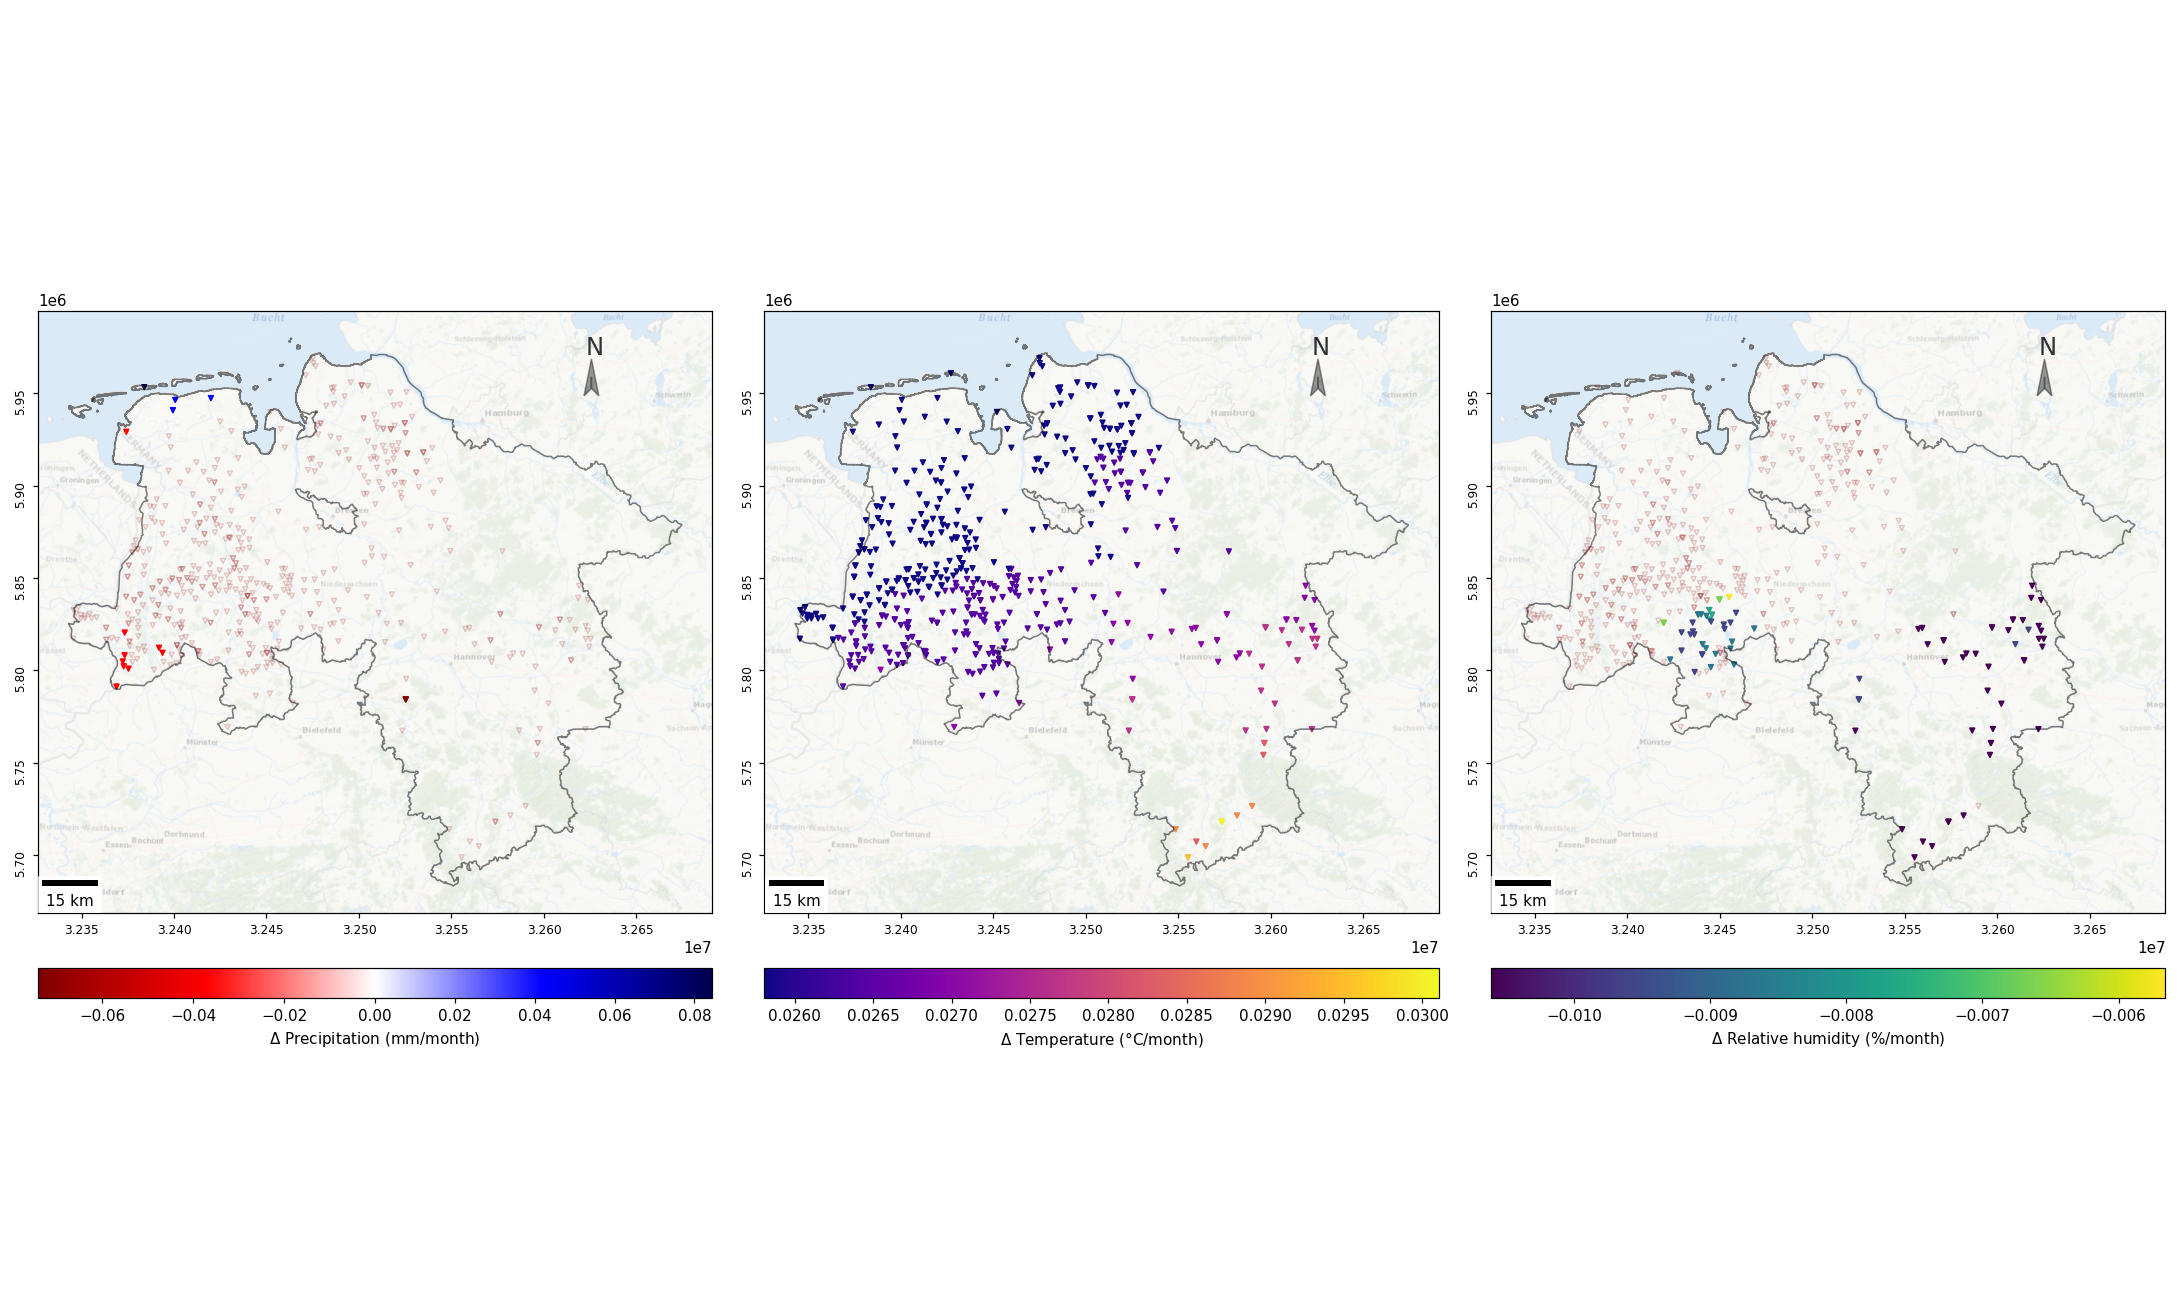

posx and posy should be finite values


<IPython.core.display.Javascript object>


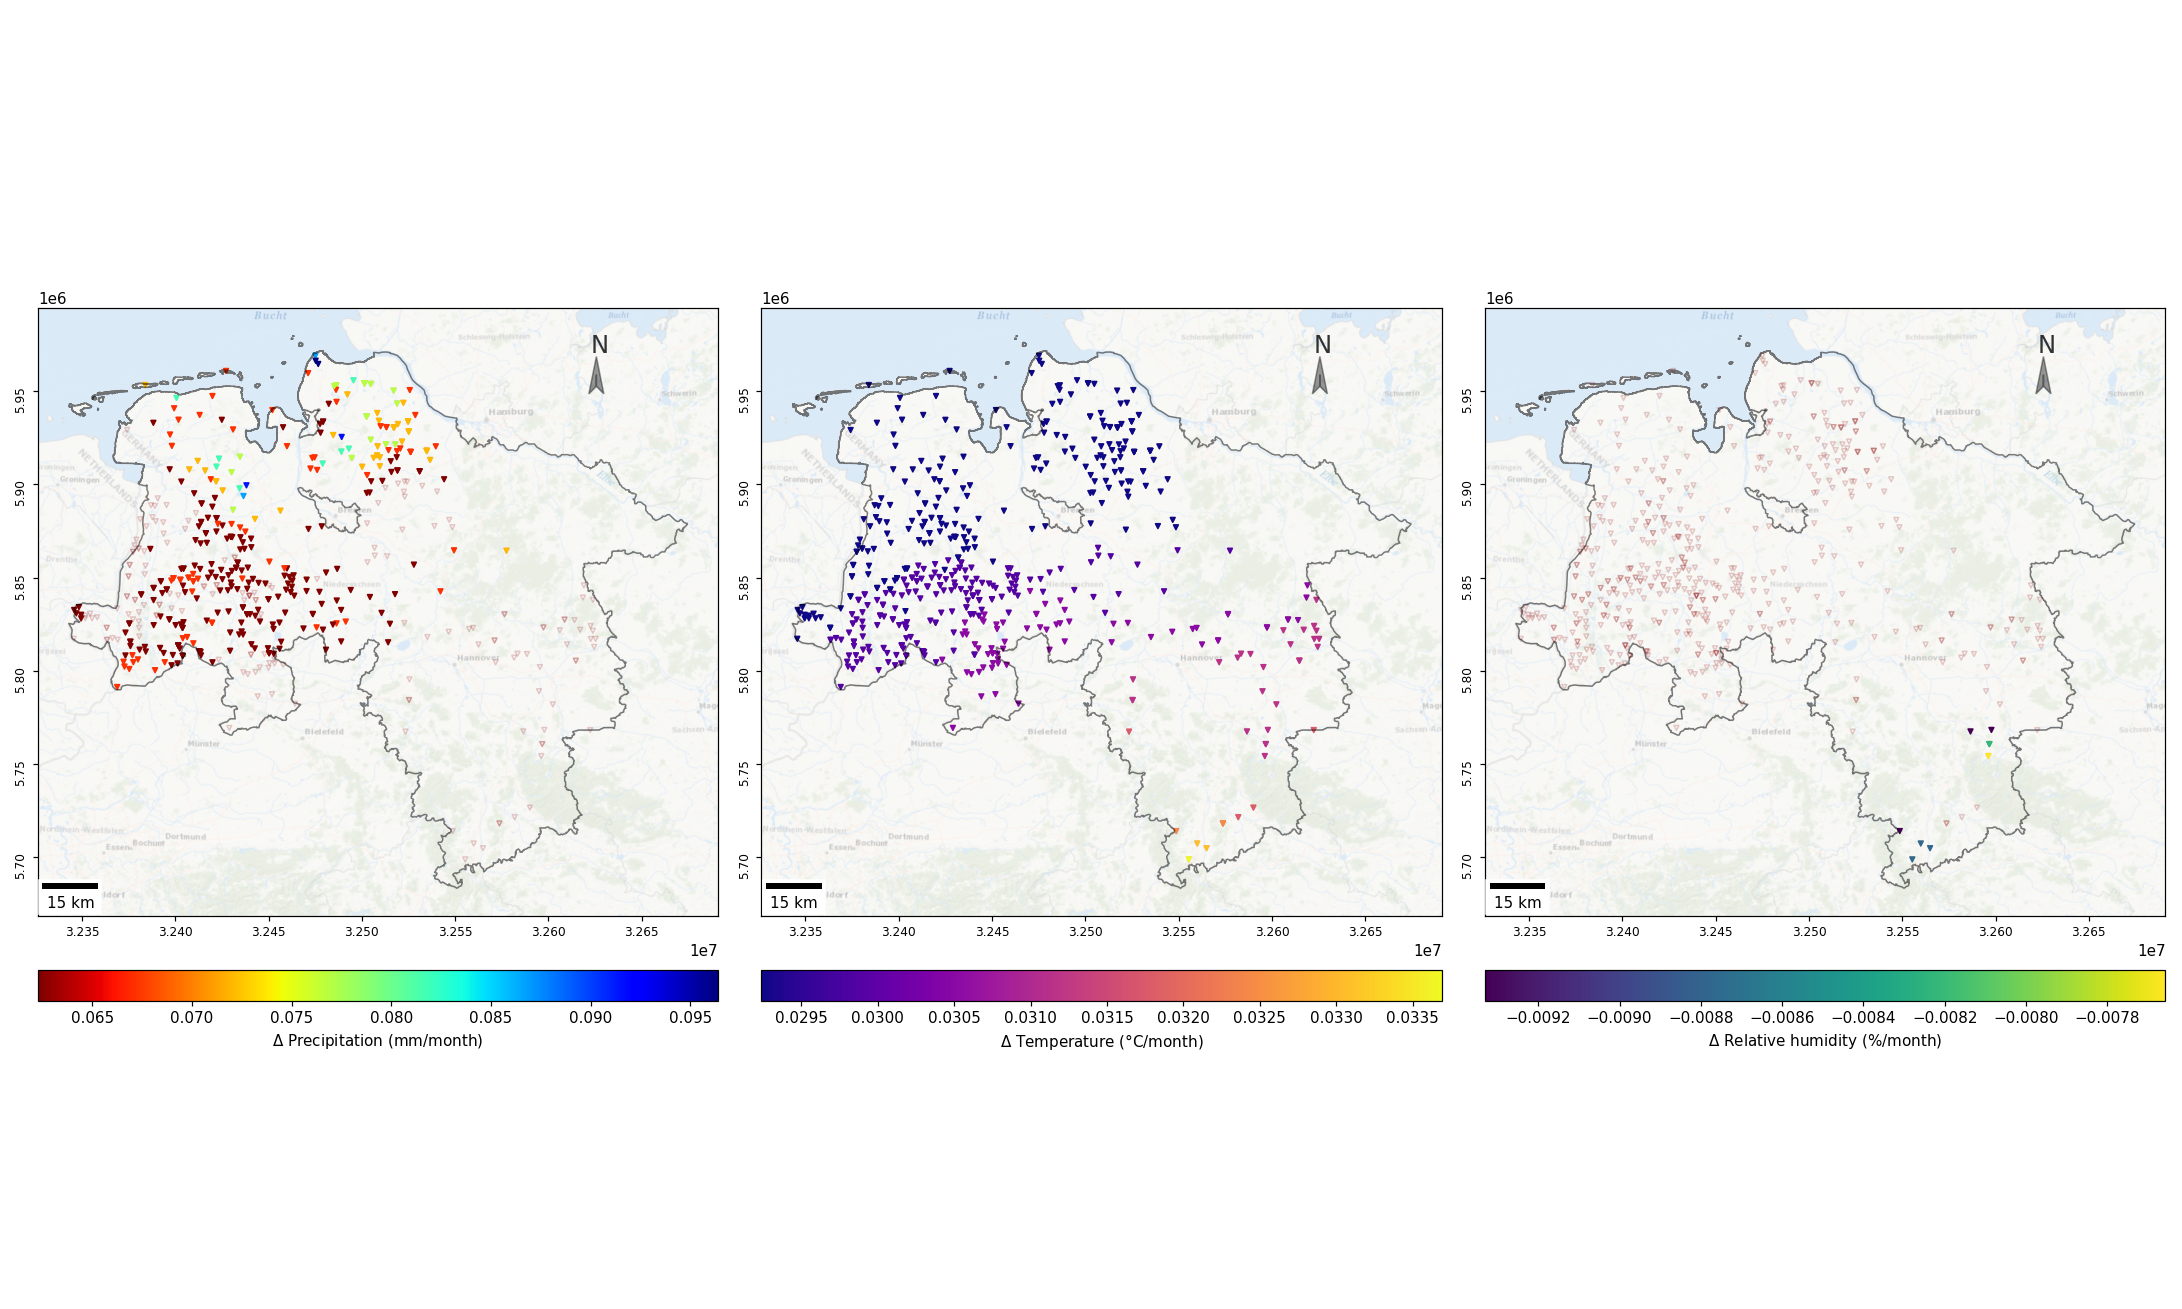

<IPython.core.display.Javascript object>


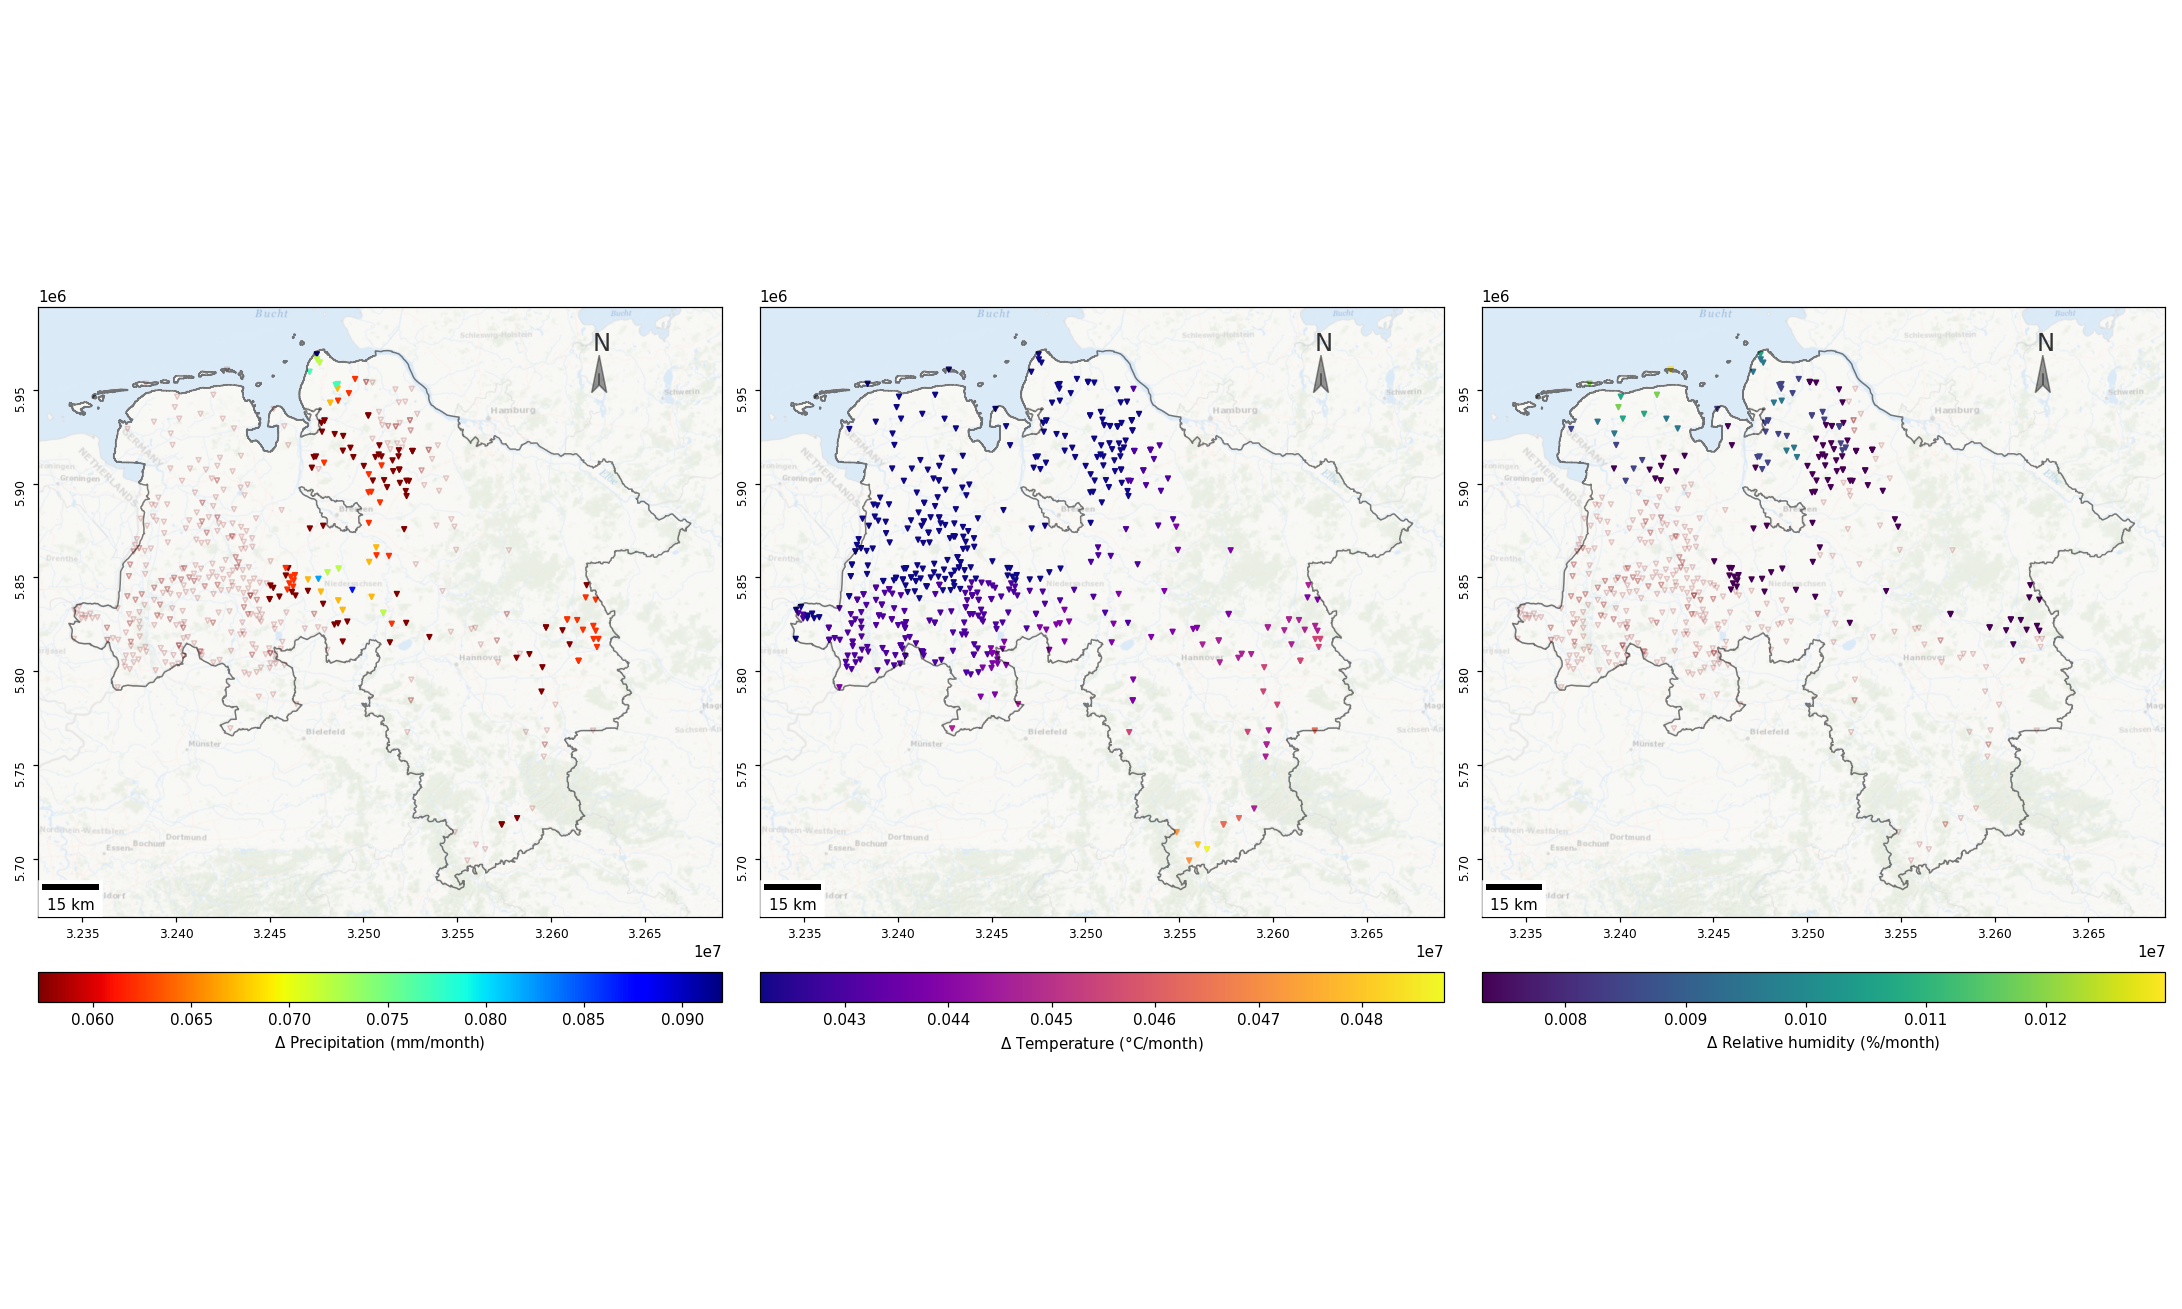

<IPython.core.display.Javascript object>


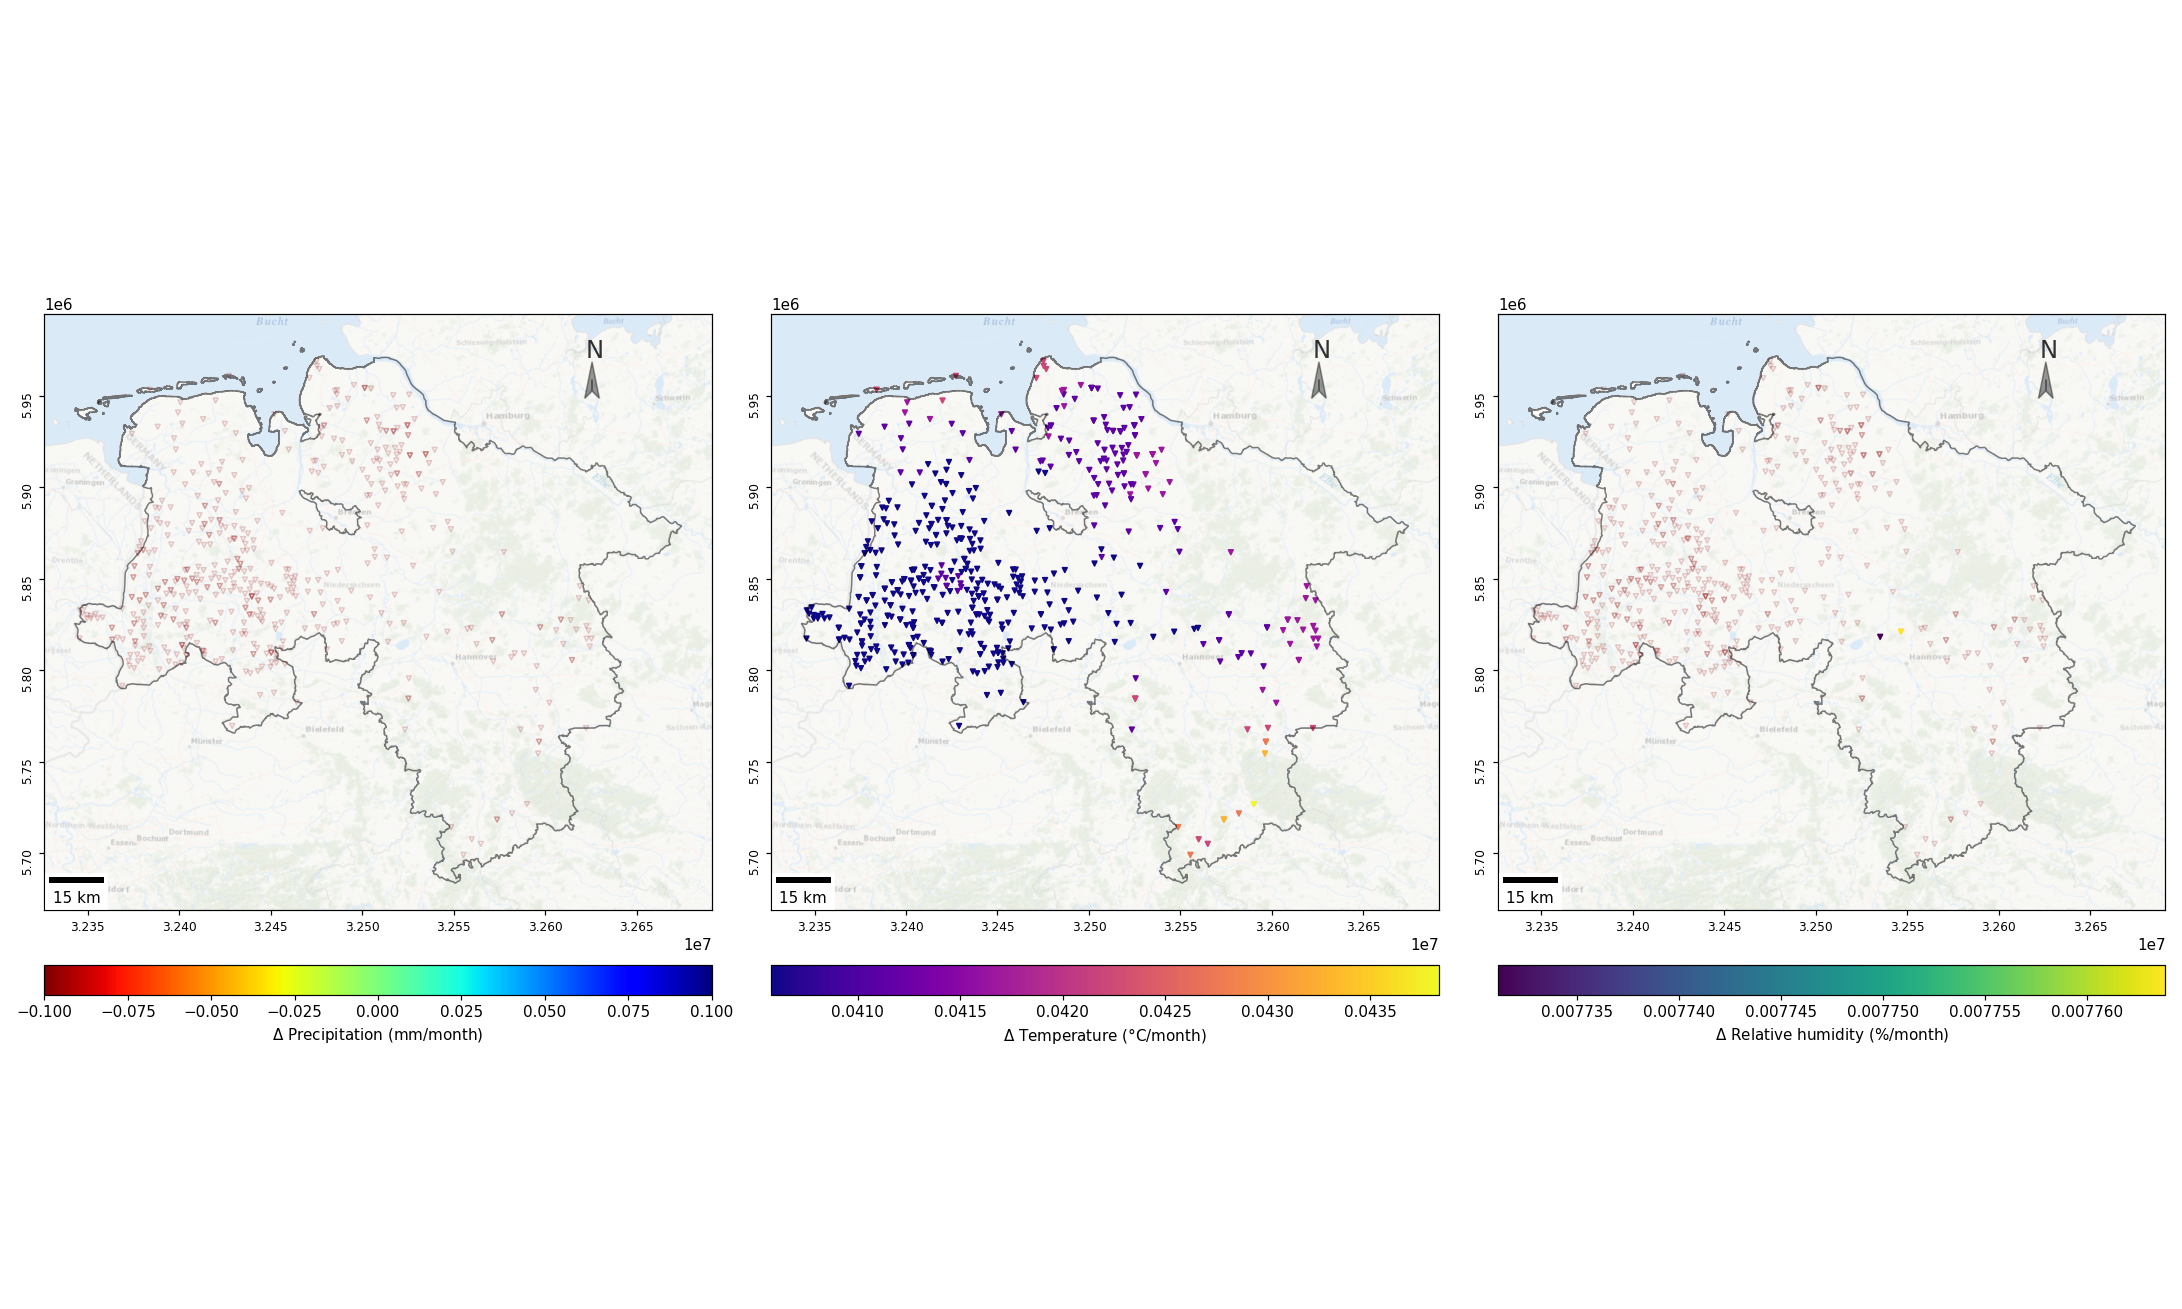

E:\condaenvs\mgo\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<IPython.core.display.Javascript object>


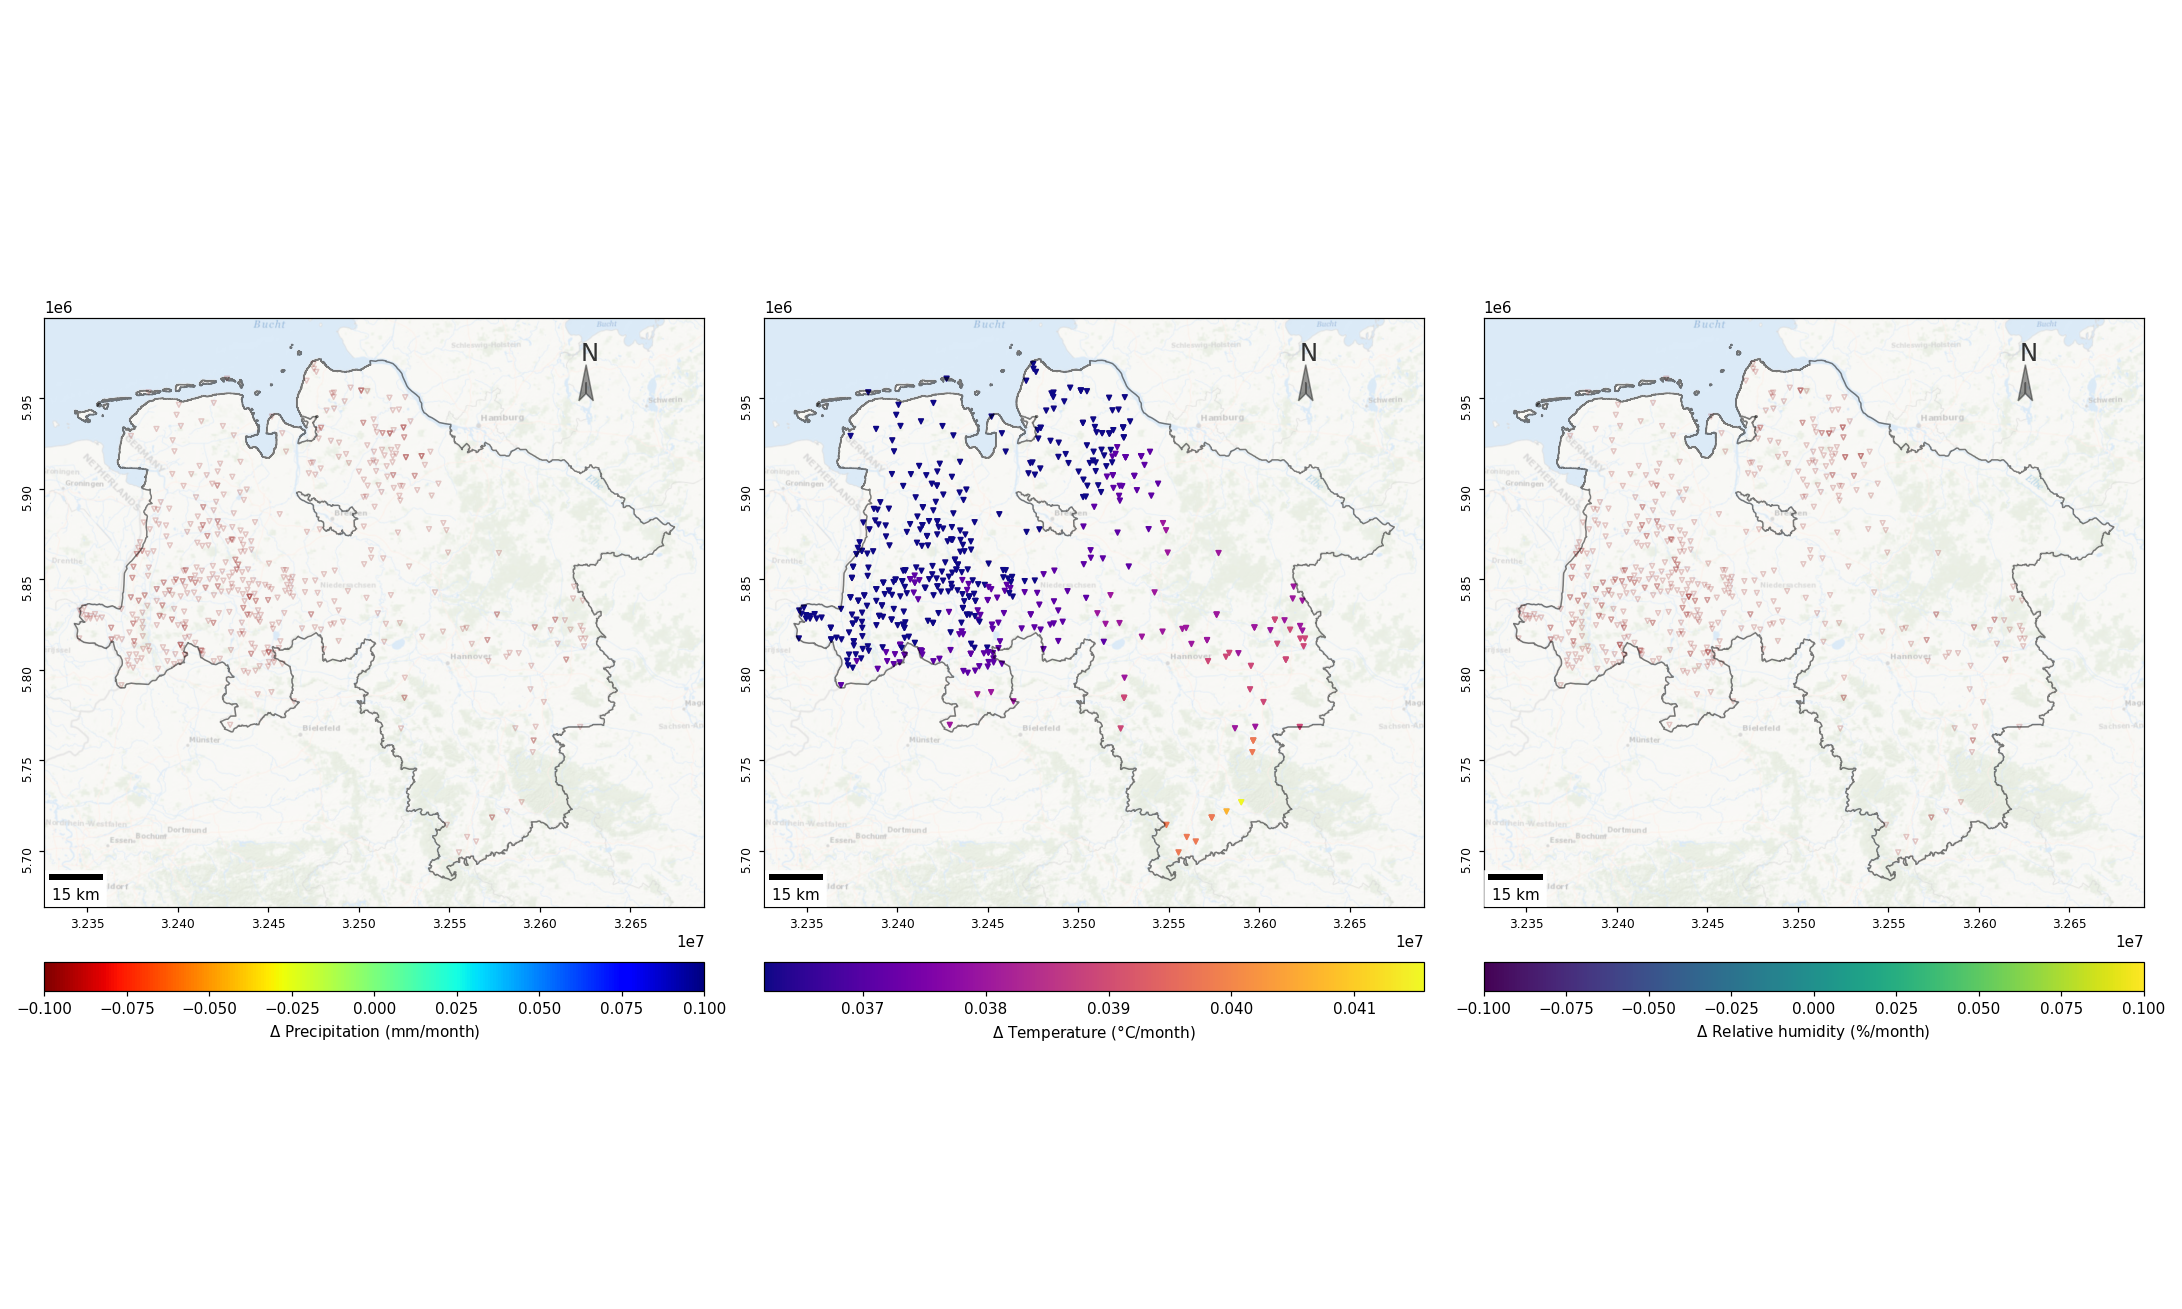

E:\condaenvs\mgo\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
E:\condaenvs\mgo\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<IPython.core.display.Javascript object>


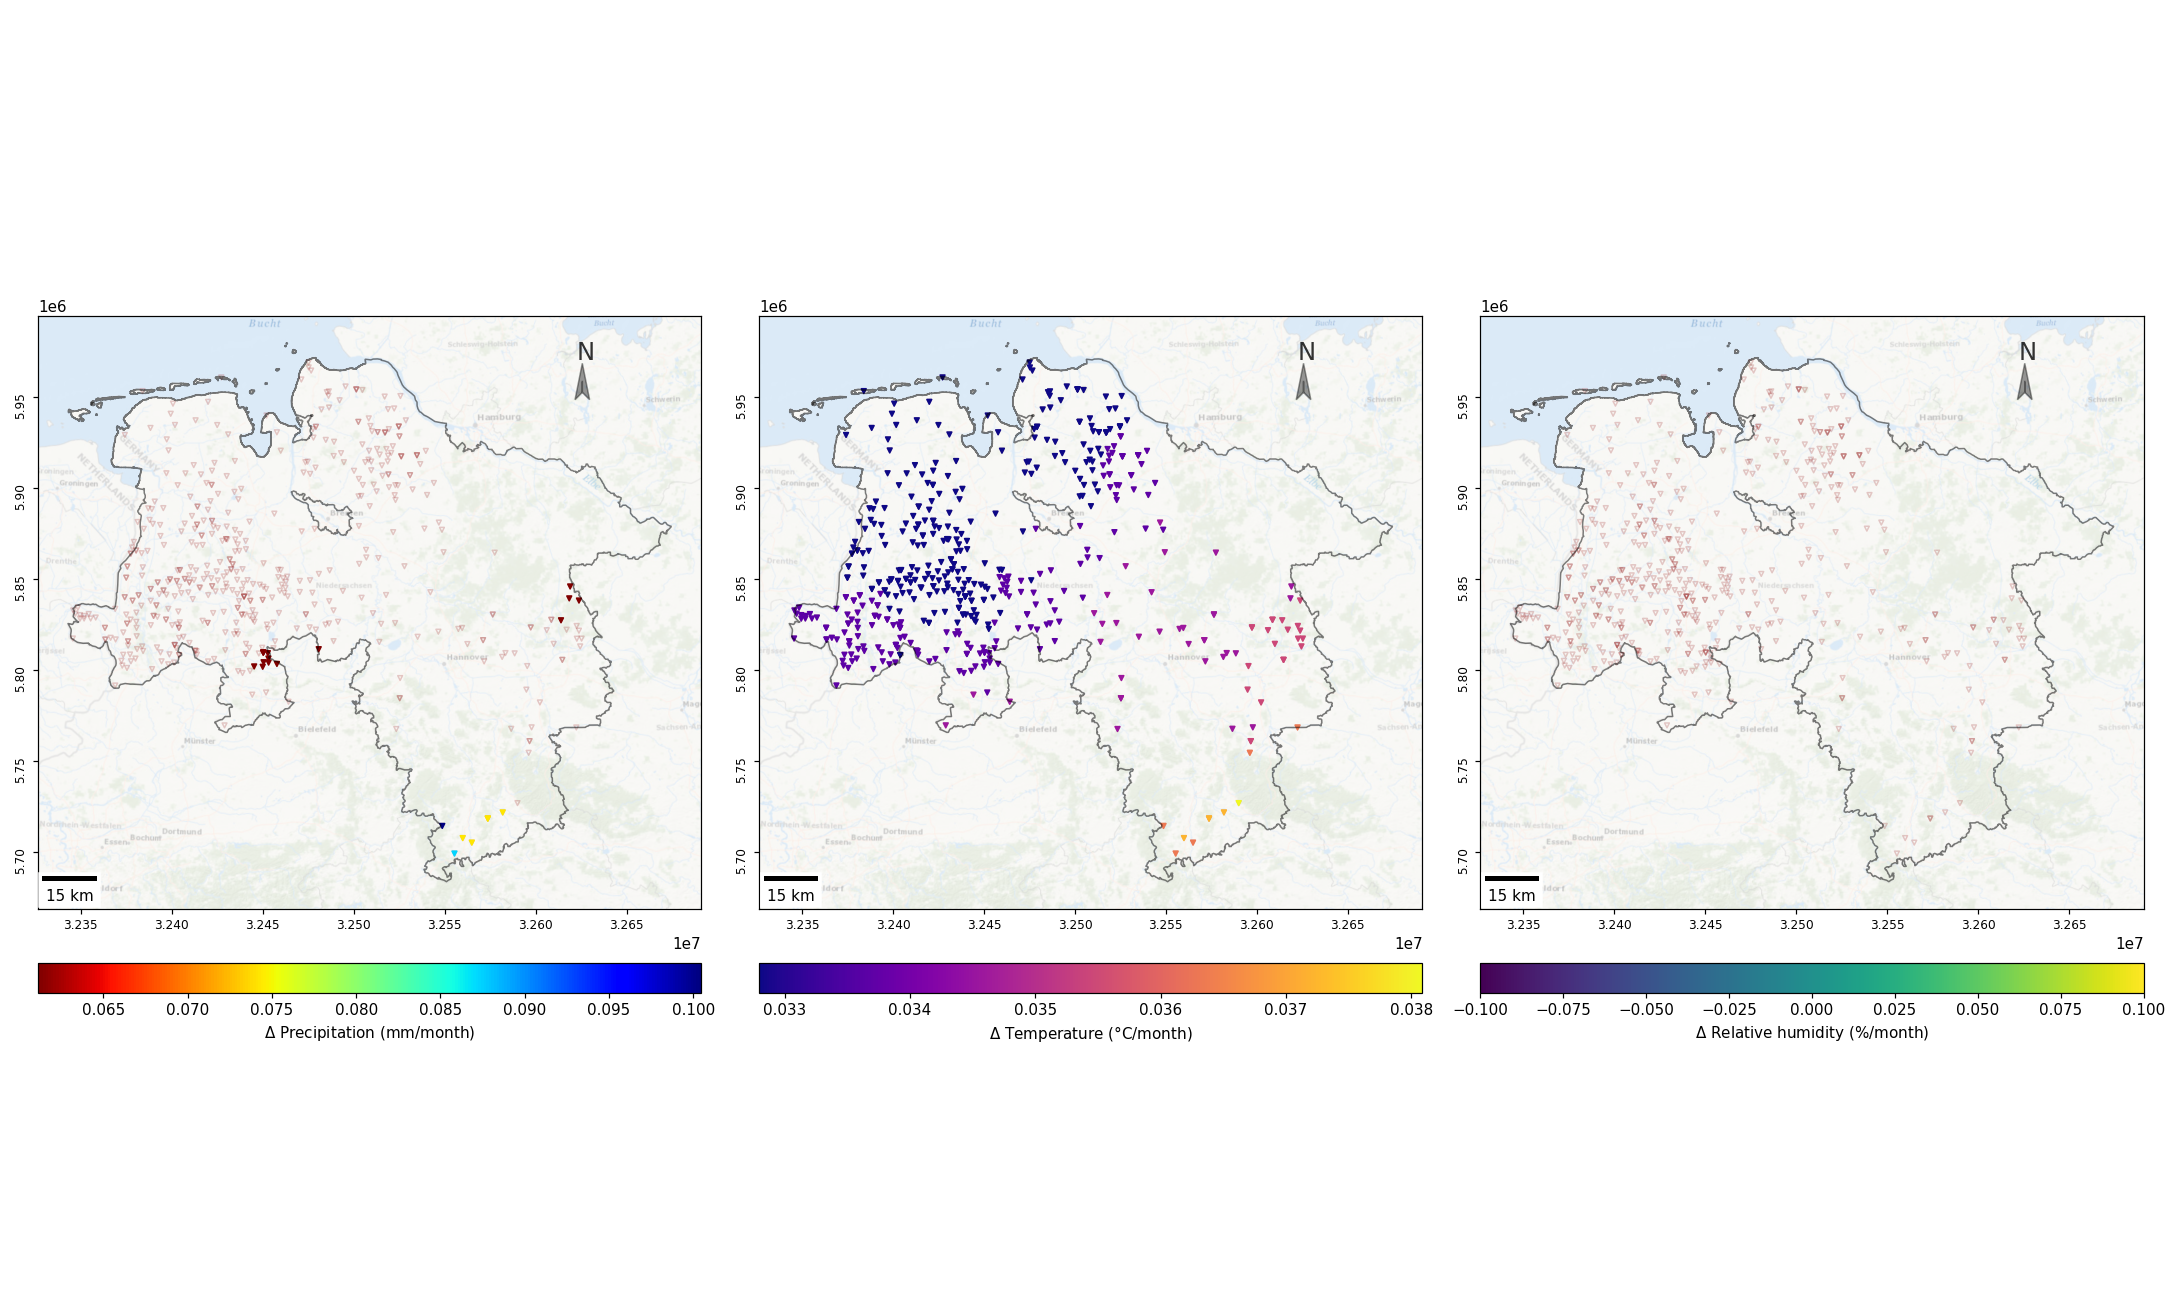

E:\condaenvs\mgo\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


In [48]:
#Plot the trends for all the climate models
for m in range(len(lmodels)):

    modelname=lmodels[m]
    dfcmpr= cmpr[m]
    dfcmtm= cmtm[m]
    dfcmrh= cmrh[m]

    #Plot spatial distribution of trends
    gwsc=gw_sel.copy()
    gwsc["strendpr"]= dfcmpr.slope
    gwsc["strendtm"]= dfcmtm.slope
    gwsc["strendrh"]= dfcmrh.slope

    #Select groundwater stations with significant trend 
    dfwtrendpr=dfcmpr.loc[dfcmpr.pval<0.05]
    gw_wtrendpr=gwsc.loc[gwsc.MEST_ID.isin(dfwtrendpr.wellid.values)]

    dfwtrendtm=dfcmtm.loc[dfcmtm.pval<0.05]
    gw_wtrendtm=gwsc.loc[gwsc.MEST_ID.isin(dfwtrendtm.wellid.values)]

    dfwtrendrh=dfcmrh.loc[dfcmrh.pval<0.05]
    gw_wtrendrh=gwsc.loc[gwsc.MEST_ID.isin(dfwtrendrh.wellid.values)]


    germany_states = gpd.read_file("D:/Data/students/mariana/data/SHP/DEU_adm1.shp")
    ND=germany_states[germany_states.NAME_1== "Niedersachsen"]

    fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, figsize=(20, 12))

    ax1=mapplot(data=gw_wtrendpr,gwstat=gwsc, countrybd=ND, 
                column="strendpr", namevar="$\Delta$ Precipitation", 
                units="mm/month", axis=ax1,cmap="jet_r")

    ax2=mapplot(data=gw_wtrendtm, gwstat=gwsc,countrybd=ND, column="strendtm",
                namevar="$\Delta$ Temperature", 
                units="°C/month", axis=ax2,cmap="plasma")

    ax3=mapplot(data=gw_wtrendrh, gwstat=gwsc, countrybd=ND, column="strendrh", 
                namevar= "$\Delta$ Relative humidity", 
                units="%/month", axis=ax3,cmap="viridis")    
    plt.tight_layout()
    plt.savefig(fpath+modelname+"_trend.png",bbox_inches="tight")   

## Plot climate variables

<IPython.core.display.Javascript object>


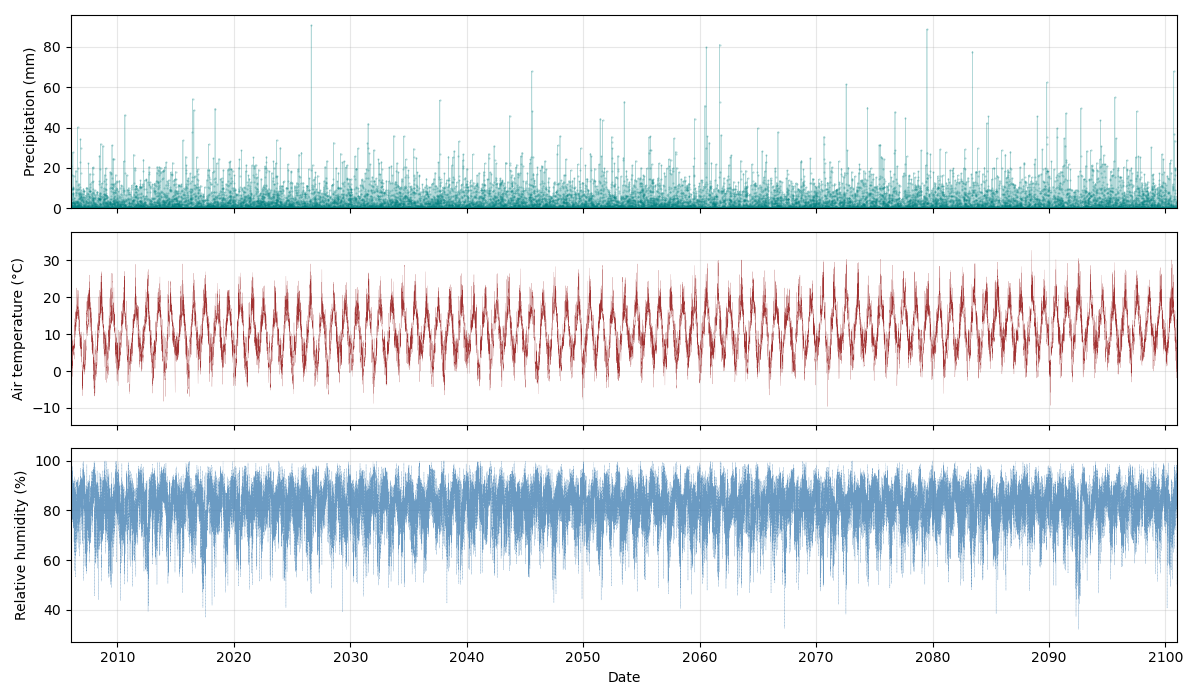

In [13]:
m=0
dfcmpr= cmpr[m]
dfcmtm= cmtm[m]
dfcmrh= cmrh[m]

i=0
dfdatapr=dfcmpr.data[i]
dfdatatm=dfcmtm.data[i]
dfdatarh=dfcmrh.data[i]


fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(12,7),sharex=True)


#Precipitation
ax1.plot(dfdatapr.dates,dfdatapr.data, marker=".", linestyle="-",
             markersize="1",linewidth="0.5", color="teal", alpha=0.3)
ax1.set_ylabel("Precipitation (mm)")
ax1.set_ylim(0,max(dfdatapr.data)+5)
ax1.set_xlim(min(dfdatapr.dates),max(dfdatapr.dates))
ax1.grid(True, alpha=0.3)


#Temperature
ax2.plot(dfdatatm.dates,dfdatatm.data,
             markersize="2",linewidth=0.1, color="darkred", alpha=0.8)

ax2.set_ylabel("Air temperature (°C)")
ax2.set_ylim(min(dfdatatm.data)-5,max(dfdatatm.data)+5)
ax2.set_xlim(min(dfdatatm.dates),max(dfdatatm.dates))
ax2.grid(True, alpha=0.3)


ax3.plot(dfdatarh.dates,dfdatarh.data, 
             markersize="2",linewidth=0.2, linestyle="--",color="steelblue", alpha=.8)

#Relative humidity
ax3.set_ylabel("Relative humidity (%)")
ax3.set_xlabel("Date")
ax3.set_ylim(min(dfdatarh.data)-5,max(dfdatarh.data)+5)
ax3.set_xlim(min(dfdatarh.dates),max(dfdatarh.dates))
ax3.grid(True, alpha=0.3)
ax3.axvline(x=10021)

fig.tight_layout()


## Statistics

In [305]:
i=1
dfdatapr=vdatapr[i]
dfdatatm=vdatatm[i]
dfdatarh=vdatarh[i]

#Precipitation
dfpr= dfdatapr.set_index("dates").copy()
rdfpr=dfpr.resample("M").sum()
decomppr=seasonal_decompose(rdfpr, model="additive", period=120)
dtrendpr=decomppr.trend
dtrend=dt.copy().dropna()
dtrend.index= np.arange(len(dtrend))
x =np.arange(len(dtrend)-1, dtype=np.float64)
y = dtrend.values[:-1].astype('float32')
slope, intercept, r_value, p_value, std_err = linregress(x, y)


#Temperature
dftm= dfdatatm.set_index("dates").copy()
rdftm=dftm.resample("M").mean()
decomptm=seasonal_decompose(rdftm, model="additive", period=120)
dtrendtm=decomptm.trend

#Relative humidity
dfrh= dfdatarh.set_index("dates").copy()
rdfrh=dfrh.resample("M").mean()
decomprh=seasonal_decompose(rdfrh, model="additive", period=120)
dtrendrh=decomprh.trend


<IPython.core.display.Javascript object>


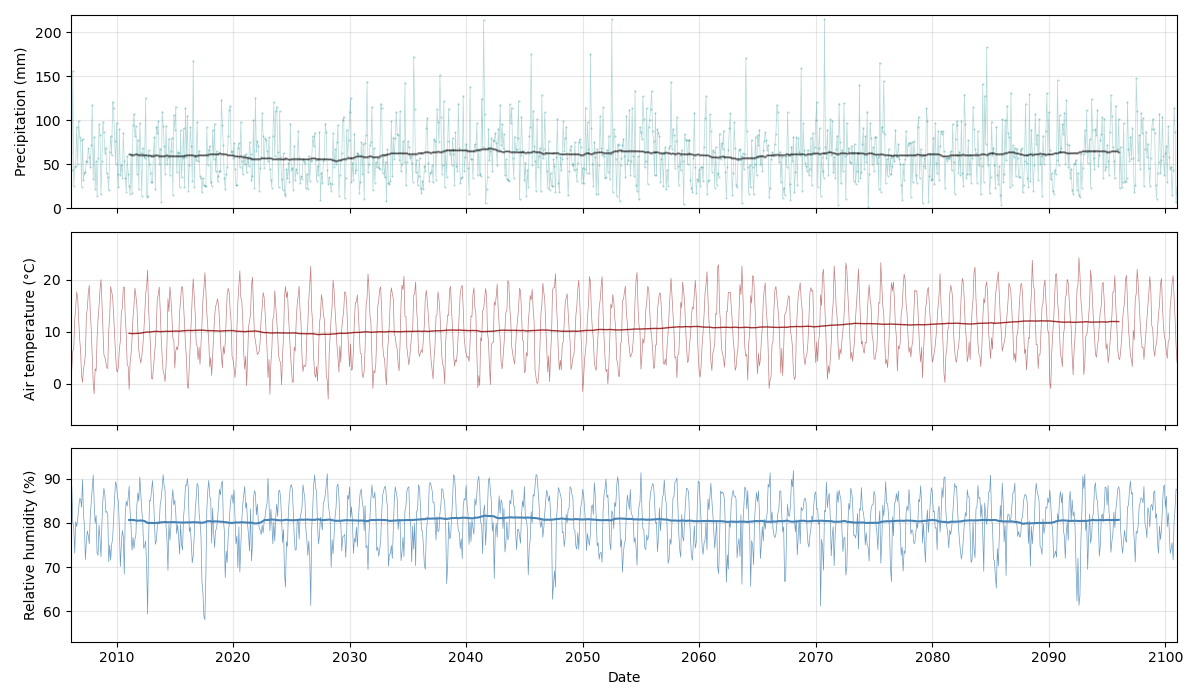

In [317]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(12,7),sharex=True)


#Precipitation
ax1.plot(rdfpr.index,rdfpr.data, marker=".", linestyle="-",
             markersize="1",linewidth="0.5", color="teal", alpha=0.3)
ax1.plot(rdfpr.index,dtrendpr, marker=".", linestyle="-",
             markersize="1",linewidth=1, color="k", alpha=0.3)
ax1.set_ylabel("Precipitation (mm)")
ax1.set_ylim(0,max(rdfpr.data)+5)
ax1.set_xlim(min(rdfpr.index),max(rdfpr.index))
ax1.grid(True, alpha=0.3)


#Temperature
ax2.plot(rdftm.index,rdftm.data,
             markersize="2",linewidth=0.5, color="darkred", alpha=0.5)
ax2.plot(rdftm.index,dtrendtm,
             markersize="2",linewidth=1, color="darkred", alpha=0.8)
ax2.set_ylabel("Air temperature (°C)")
ax2.set_ylim(min(rdftm.data)-5,max(rdftm.data)+5)
ax2.set_xlim(min(rdftm.index),max(rdftm.index))
ax2.grid(True, alpha=0.3)


ax3.plot(rdfrh.index,rdfrh.data, 
             markersize="2",linewidth=0.5, linestyle="-",color="steelblue", alpha=.8)
ax3.plot(rdfrh.index,dtrendrh, 
             markersize="2",linewidth=1.5, linestyle="-",color="steelblue", alpha=1)

#Relative humidity
ax3.set_ylabel("Relative humidity (%)")
ax3.set_xlabel("Date")
ax3.set_ylim(min(rdfrh.data)-5,max(rdfrh.data)+5)
ax3.set_xlim(min(rdfrh.index),max(rdfrh.index))
ax3.grid(True, alpha=0.3)
ax3.axvline(x=10021)

fig.tight_layout()



